# MNIST - Digit Recognizer

In [1]:
# 1. Each image from the MNIST Dataset has 28x28px (784 pixels) or a problem with inputs from 0 to 255
# 2. 0 corresponds to purely black and 255 to purely white
# 3. We will use a SoftMax activation function for the output layer (Softmax classifiers give us the 
# probabilities for each class label)

## The action plan

#### 1. Prepare our data and preprocess it. We will create training, validation and test datasets.

#### 2. Outline the model and choose the activation functions

#### 3. Set the appropiate advanced optimizers and the loss function

#### 4. Make it learn

## Import the packages

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Collection of datasets ready-to-use 
import tensorflow_datasets as tfds

## Data

In [3]:
# with_info parameter will provide us the version, number of samples etc.

In [4]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

# Splitting the dataset into train and test
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

# Extracting 10% from the training data to form the validaton dataset
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
# The tf.cast() function is used to cast a specified Tensor to a  new data type.
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

# We are scaling our inputs
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.   # Dot means float number
    return image, label


scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

# Used to shuffle the data
BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)


BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)
# We are Forward Propagating here

validation_inputs, validation_targets = next(iter(validation_data))
# iter created an object which can be iterated one element at a time (like for loop)

In [5]:
list_test_data = list(test_data)
list_test_data

[(<tf.Tensor: shape=(10000, 28, 28, 1), dtype=float32, numpy=
  array([[[[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          ...,
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]]],
  
  
         [[[0.],
           [0.],
           [0.],
           ...,
           [0.],
           [0.],
           [0.]],
  
          [[0.],
           [0.],
           [0.],
           

In [6]:
# The batch size is a number of samples processed before the model is updated.
# 1. batch size = 1 = Stochastic gradient descent(SGD)
# 2. batch size = samples = (single batch) GD
# 3. Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set. 

# The number of epochs is the number of complete passes through the training dataset

## Model

## Outline the Model

In [7]:
# 784 inputs layers
# 10 outputs nodes for each digit
# we will work with 2 hidden layers with 50 nodes each

In [8]:
input_size = 784
output_size = 10
hidden_layer_size = 100

# Flatten --> Trannsforms the tensor, the image into a vector
# Stack the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    # Further, we will build the neural network
    # Takes the inputs, calculates the dot product, weights and adds the bias
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax'), # The output will be based on probabilities
])

## Choose the optimizer and the loss function

In [9]:
# Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.
# Categorical crossentropy with integer targets = sparse_categorical_crossentropy.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training

In [10]:
NUM_EPOCHS = 5

# At the beggining of each epoch(iteration), the training loss will be set to zero
# The algorithm will iterate over a preset number of batches, all from train_data
# The weights and biases will be updated as many times as there are batches
# We will get a value for the loss function, indicating how the training is going
# We will also see a training accuracy
# At the end of the epoch, the algorithm will forward propagate the whole validation set
# Max num of epochs = training over

model.fit(train_data, epochs = NUM_EPOCHS, validation_data = (validation_inputs, validation_targets), verbose=2)

Epoch 1/5
540/540 - 6s - loss: 0.3360 - accuracy: 0.9042 - val_loss: 0.1663 - val_accuracy: 0.9520
Epoch 2/5
540/540 - 3s - loss: 0.1386 - accuracy: 0.9589 - val_loss: 0.1085 - val_accuracy: 0.9687
Epoch 3/5
540/540 - 4s - loss: 0.0974 - accuracy: 0.9710 - val_loss: 0.0815 - val_accuracy: 0.9762
Epoch 4/5
540/540 - 4s - loss: 0.0740 - accuracy: 0.9776 - val_loss: 0.0740 - val_accuracy: 0.9780
Epoch 5/5
540/540 - 3s - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0545 - val_accuracy: 0.9838


## Test the model

In [11]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 0s 311ms/step - loss: 0.0815 - accuracy: 0.9738


In [12]:
print(f'Test loss: {round(test_loss, 4)}. Test accuracy: {round(test_accuracy, 4)*100}%')

Test loss: 0.0815. Test accuracy: 97.38%


## Testing with our own digits

In [21]:
own_data = cv2.imread('numbers/six.PNG', cv2.IMREAD_GRAYSCALE)

In [22]:
own_data = cv2.resize(own_data, (28, 28))
own_data = own_data.astype('float32')
own_data = own_data.reshape(1, 28, 28, 1)
own_data = 255-own_data
own_data /= 255

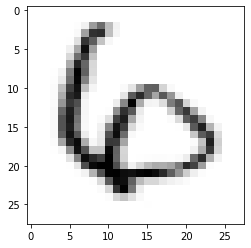

In [23]:
plt.imshow(own_data.reshape(28, 28),cmap='Greys')
plt.show()

In [24]:
# img_prediction = model.predict(own_data)
# img_prediction

In [25]:
pred = model.predict(own_data.reshape(1, 28, 28, 1), batch_size=100)

In [26]:
print(pred.argmax())

6
